## Location Convert

- This notebook convert `latitude` and `longitude` coordinates to `neighberhood` name in Pittsburgh
- The data not in Pittsburgh will be deleted

### Step 1

- Import packages
    - `pandas`
    - `geopandas`
- Use `pip install geopandas` to install if needed
- Load dataset file
- Check the first `10` data to make sure loading correctly

In [17]:
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
from shapely.geometry import Point

rest_df = pd.read_csv('../../data_cleaned/assets/restaurants.csv')
print("Number of restaurant:", len(rest_df))
print(rest_df[['latitude', 'longitude']].head(10))

Number of restaurant: 3924
    latitude  longitude
0  40.305110 -79.976298
1  40.445871 -79.993547
2  40.366054 -80.106407
3  40.600047 -79.761510
4  40.384166 -79.859313
5  40.408769 -79.904709
6  40.540583 -80.182005
7  40.464399 -79.966289
8  40.407991 -79.943308
9  40.432405 -79.893877


### Step 2

- Initial `geopandas` function

In [27]:
# Load files from Makay's workplace

# Create point data frame
geometry = [Point(xy) for xy in zip(rest_df['longitude'], rest_df['latitude'])]
gdf_rest_points = gpd.GeoDataFrame(
    rest_df,
    geometry=geometry,
    crs="EPSG:4326"
)

# Load shapefile
neighborhoods = gpd.read_file('../../../Makayla - 311 data analysis/Neighborhood boundaries/neighborhoods (1)/Neighborhoods_.shp')
print("Neighborhood Shapefile CRS", neighborhoods.crs)

# Uniform coordinate systems
# neighborhoods = neighborhoods.to_crs(gdf_rest_points.crs)
gdf_rest_points = gdf_rest_points.to_crs(neighborhoods.crs)

# Join spaces
joined = gpd.sjoin(gdf_rest_points, neighborhoods, how='inner', predicate='within')

# print(neighborhoods.columns)
print(joined[['name', 'hood']].head(10))
joined[['name', 'hood']].to_csv('../../data_cleaned/restaurants.csv', index=False)

Neighborhood Shapefile CRS EPSG:2272
                                                 name  \
1             AC Hotel Level 7 Kitchen & Rooftop Bar    
7   A Sweet Boutique by Bella Christie & Lilâ Zâs   
8                                            61Z Cafe   
11                    AFC Sushi @ Children's Hospital   
12                   A's 2's / Ace's & Deuce's Lounge   
14                                   A Taste Of India   
17                                         941 Saloon   
19                                   876 Island Spice   
20                                   802 Bean Company   
21                   77 Cafe' / Guckenheimer Services   

                         hood  
1              Strip District  
7         Lower Lawrenceville  
8                   Hazelwood  
11      Central Lawrenceville  
12                      Bluff  
14                 Bloomfield  
17  Central Business District  
19                 East Hills  
20                  Brookline  
21           So

### Step 3

- Draw a graph to see the disturbution of data points

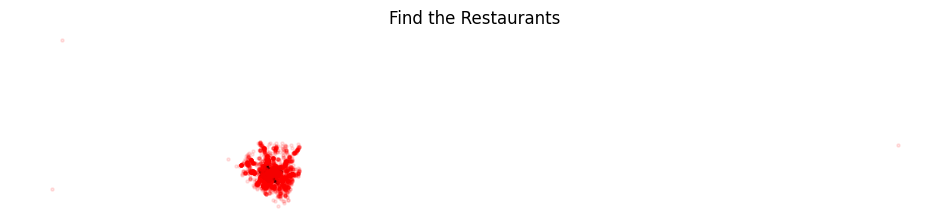

In [28]:
figure, ax = plt.subplots(figsize=(12, 12))
neighborhoods.plot(ax=ax, color='white', edgecolor='black')
gdf_rest_points.plot(ax=ax, markersize=5, color='red', alpha=0.1)
plt.title("Find the Restaurants")
plt.axis('off')
plt.show()